In [1]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np

wine = load_wine()
WineData = np.column_stack([wine.data, wine.target])

# Sử dụng bộ dữ liệu rượu ( Data Wine ) 

# Trực quan hóa dữ liệu

In [3]:
WineData

array([[  14.23,    1.71,    2.43, ...,    3.92, 1065.  ,    0.  ],
       [  13.2 ,    1.78,    2.14, ...,    3.4 , 1050.  ,    0.  ],
       [  13.16,    2.36,    2.67, ...,    3.17, 1185.  ,    0.  ],
       ...,
       [  13.27,    4.28,    2.26, ...,    1.56,  835.  ,    2.  ],
       [  13.17,    2.59,    2.37, ...,    1.62,  840.  ,    2.  ],
       [  14.13,    4.1 ,    2.74, ...,    1.6 ,  560.  ,    2.  ]])

In [4]:
print("Shape of WineData:", WineData.shape)
print("First 5 rows of WineData:\n", WineData[:5, :])


Shape of WineData: (178, 14)
First 5 rows of WineData:
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03 0.000e+00]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03 0.000e+00]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03 0.000e+00]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03 0.000e+00]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02 0.000e+00]]


In [5]:
features = wine.data
labels = wine.target

Gồm có 13 đặc trưng và 3 loại rượu để phân biệt.

In [6]:
import pandas as pd

df = pd.DataFrame(data=np.column_stack([features, labels]), columns=wine.feature_names + ["target"])
print(df.describe())


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

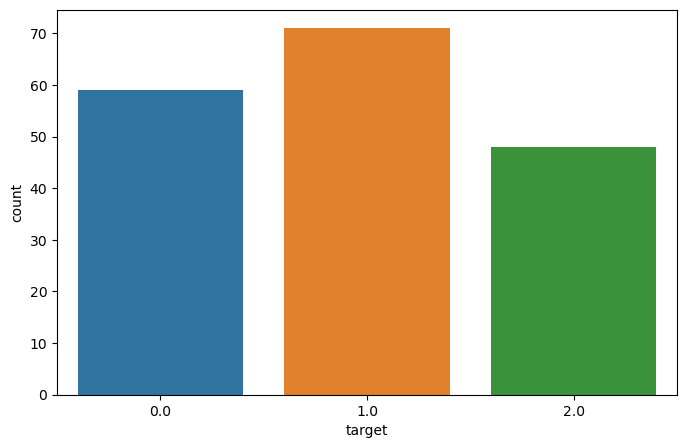

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x="target", data=df)
plt.show()


# Xem rõ hơn về mối quan hệ của các đặc trưng bằng biểu đồ phân tán

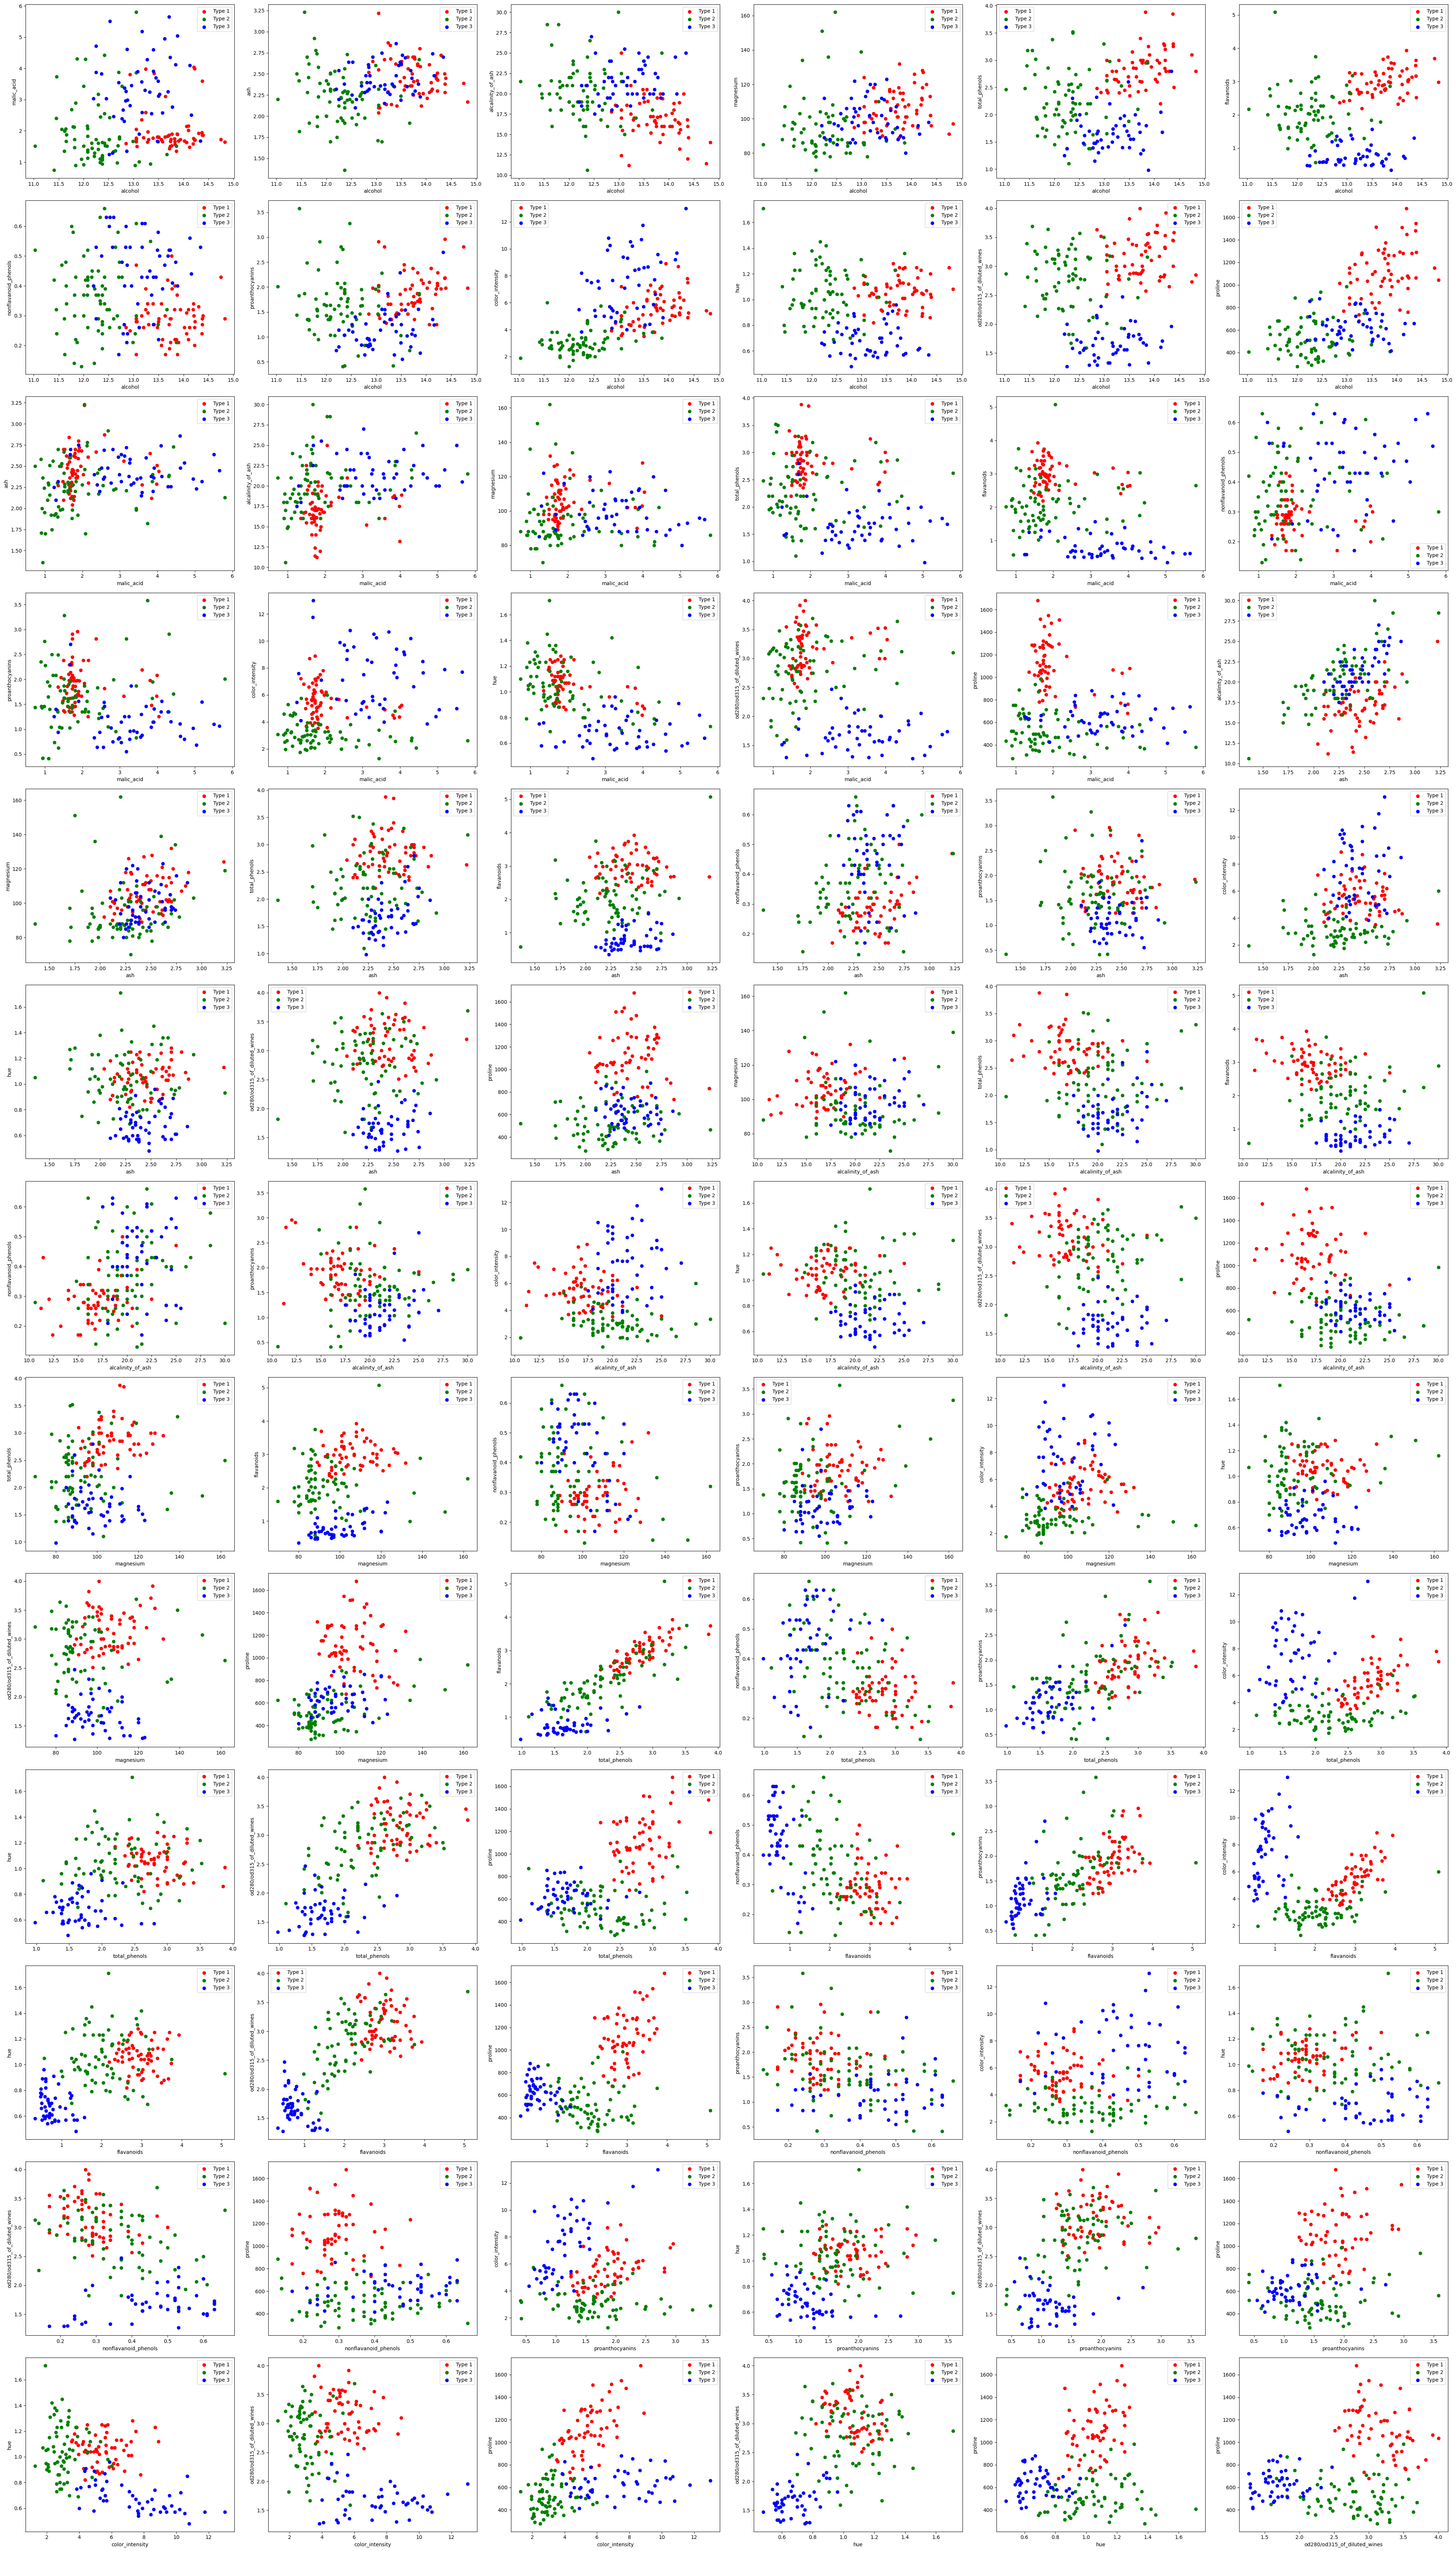

In [9]:
def plot_wine_data(WineData, WineMeas):
    num_features = len(WineMeas)  # Số lượng đặc trưng
    cols = ['r', 'g', 'b']  

    # Tạo tất cả các cặp đặc trưng
    feature_pairs = [(i, j) for i in range(num_features) for j in range(i+1, num_features)]

    num_subplots = len(feature_pairs)
    num_rows = 13
    num_cols = 6

    # Tính số lượng figure cần để vẽ hết tất cả subplot
    num_figures = num_subplots // (num_rows * num_cols) + int(num_subplots % (num_rows * num_cols) != 0)

    for fig_num in range(num_figures):
        plt.figure(figsize=(40, 70))

        for p in range(num_rows * num_cols):
            idx = fig_num * num_rows * num_cols + p
            if idx < num_subplots:
                f1, f2 = feature_pairs[idx]
                plt.subplot(num_rows, num_cols, p + 1)

                for c in np.unique(WineData[:, -1]):
                    q = np.where(WineData[:, -1] == c)
                    plt.scatter(WineData[q, f1], WineData[q, f2], c=cols[int(c)], label=f"Class {int(c)}", marker='o')

                plt.xlabel(WineMeas[f1])
                plt.ylabel(WineMeas[f2])
                plt.legend(['Type 1','Type 2','Type 3'])

        plt.tight_layout()
        plt.show()

# Gọi hàm để vẽ biểu đồ
plot_wine_data(WineData, wine.feature_names)



# Lọc ra các cặp đặc trưng có độ phân tán cao 

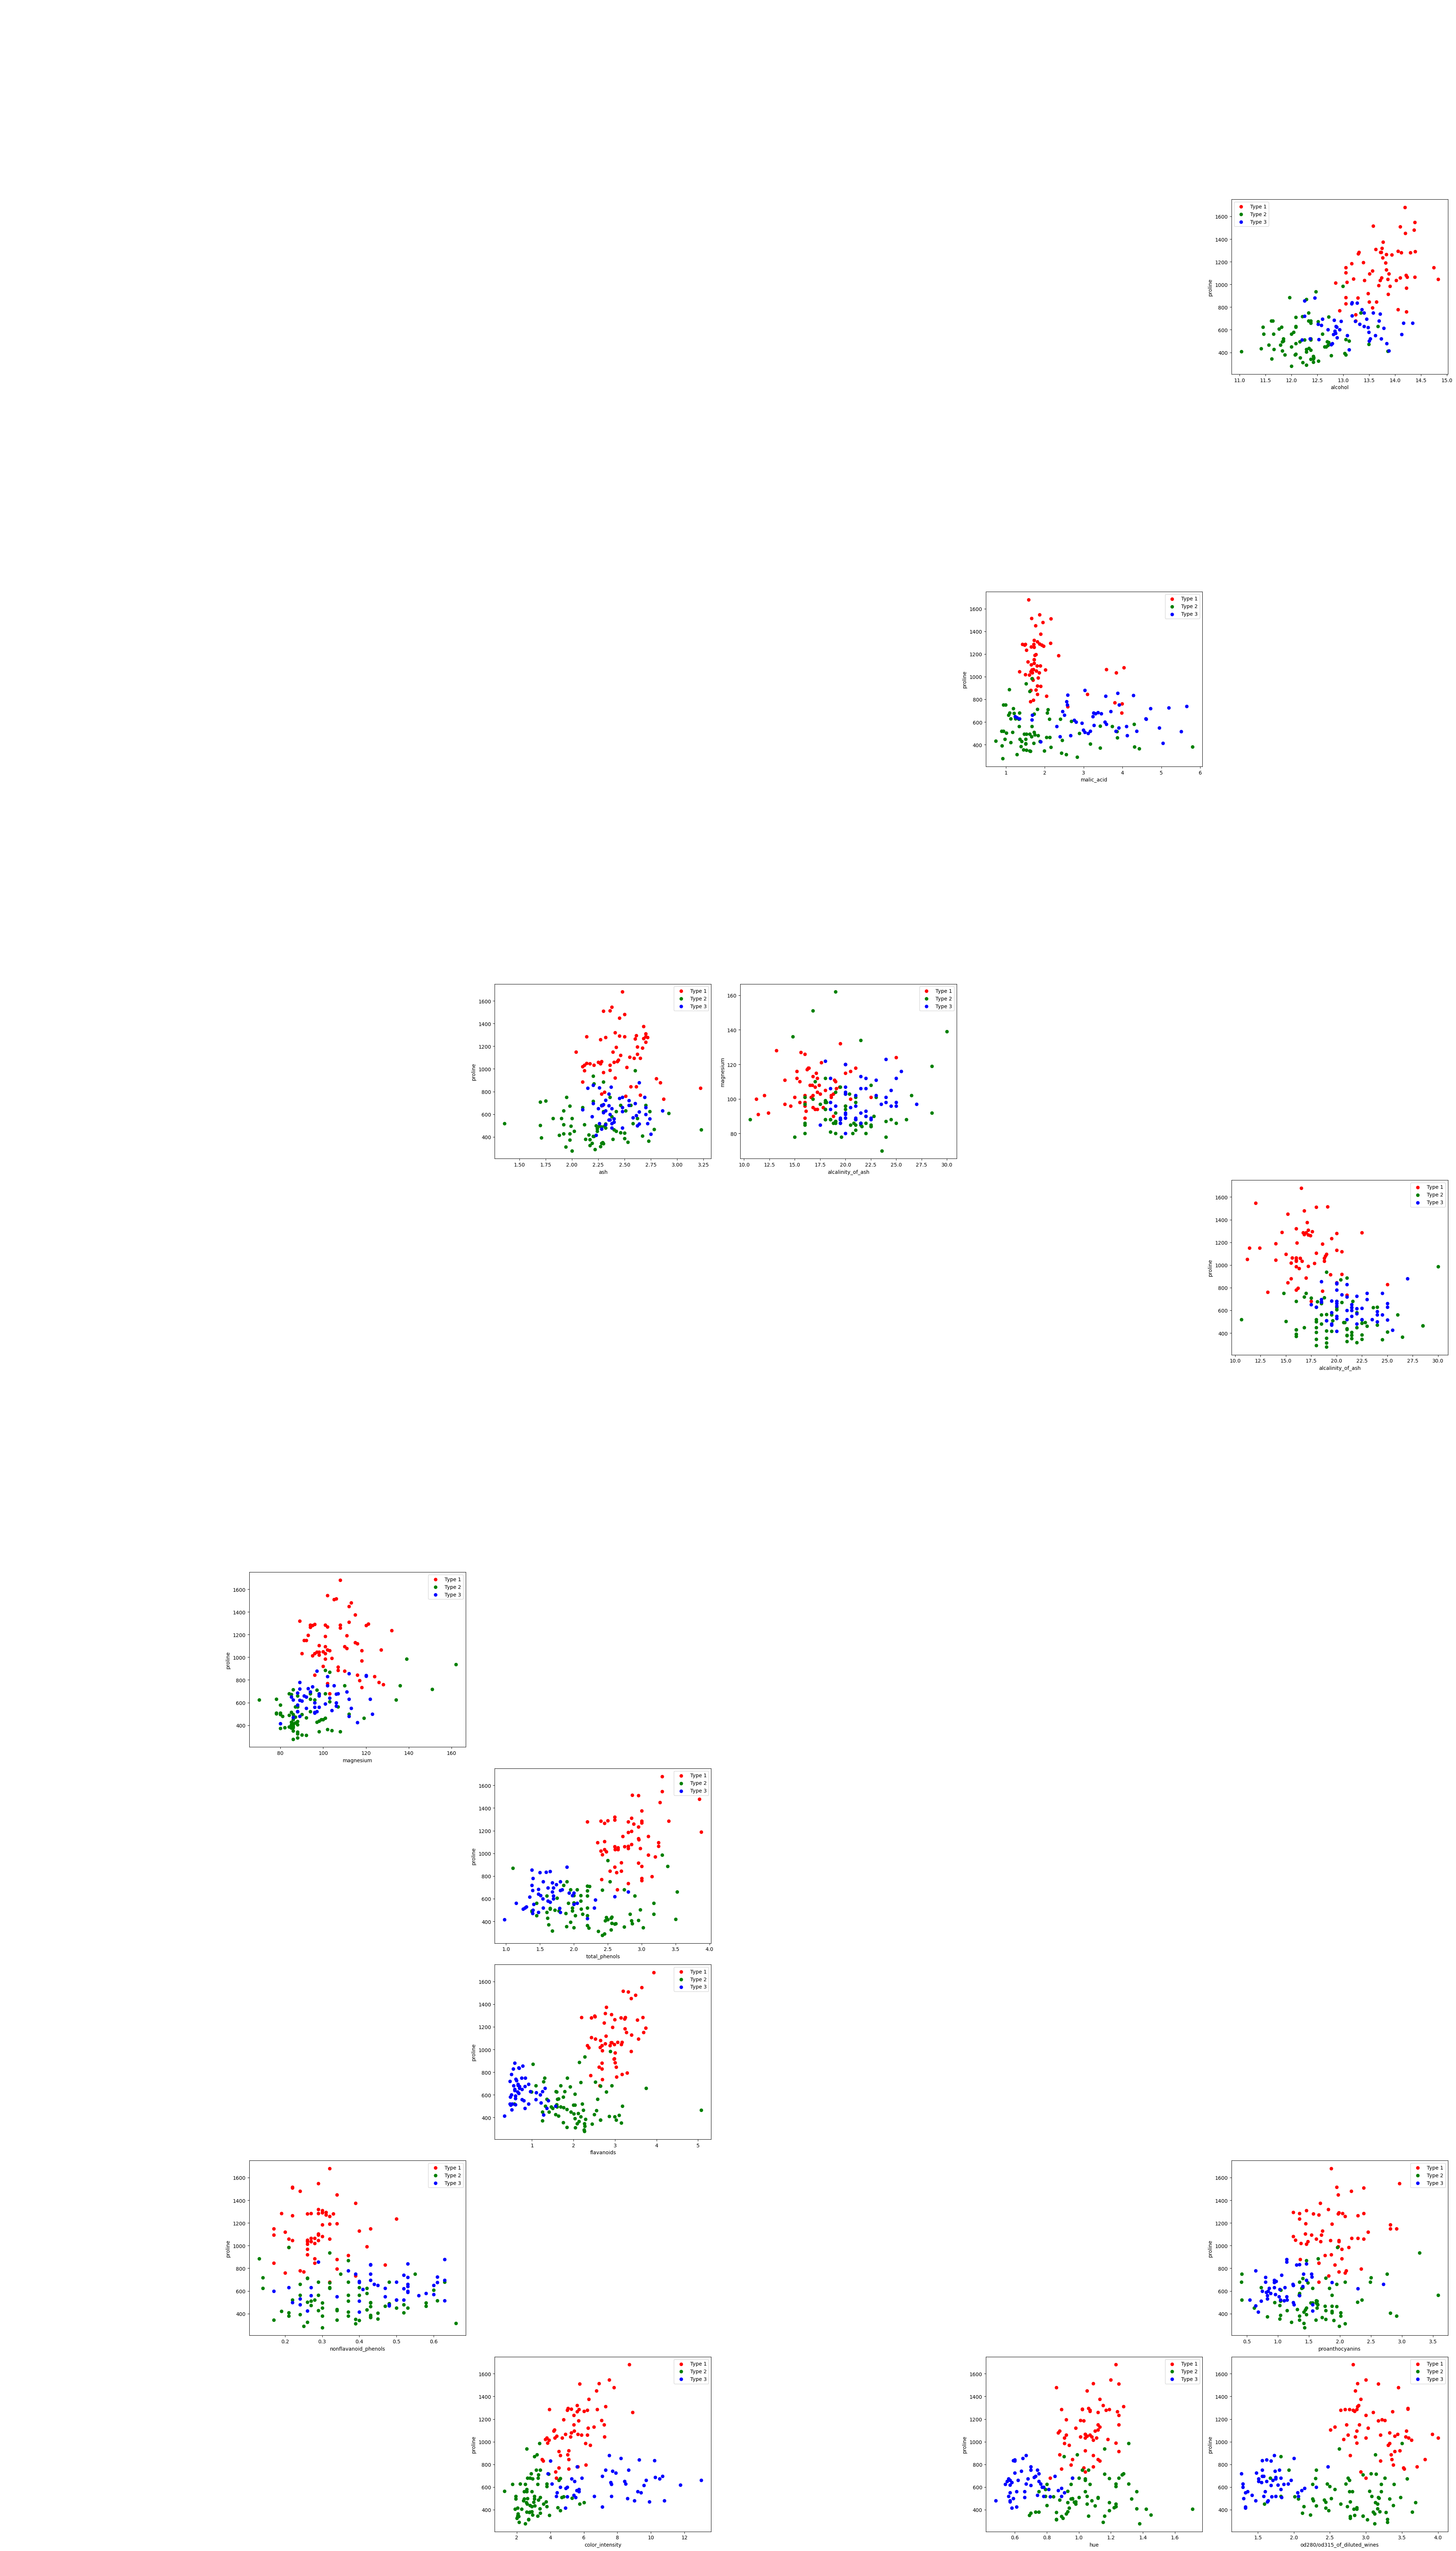

In [65]:
import matplotlib.pyplot as plt
import numpy as np

def plot_wine_data(WineData, WineMeas, min_dispersion=0.1):
    num_features = len(WineMeas)  # Số lượng đặc trưng
    cols = ['r', 'g', 'b']  

    # Tạo tất cả các cặp đặc trưng
    feature_pairs = [(i, j) for i in range(num_features) for j in range(i+1, num_features)]

    num_subplots = len(feature_pairs)
    num_rows = 13
    num_cols = 6

    # Tính số lượng figure cần để vẽ hết tất cả subplot
    num_figures = num_subplots // (num_rows * num_cols) + int(num_subplots % (num_rows * num_cols) != 0)

    for fig_num in range(num_figures):
        plt.figure(figsize=(40, 70))

        for p in range(num_rows * num_cols):
            idx = fig_num * num_rows * num_cols + p
            if idx < num_subplots:
                f1, f2 = feature_pairs[idx]
                plt.subplot(num_rows, num_cols, p + 1)

                # Tính độ phân tán của tất cả các lớp
                dispersions = [np.var(WineData[WineData[:, -1] == c, f1]) + np.var(WineData[WineData[:, -1] == c, f2])
                               for c in np.unique(WineData[:, -1])]

                # Kiểm tra xem có ít nhất một lớp có độ phân tán lớn hơn hoặc bằng ngưỡng không
                if min(dispersions) >= min_dispersion:
                    for c in np.unique(WineData[:, -1]):
                        q = np.where(WineData[:, -1] == c)
                        plt.scatter(WineData[q, f1], WineData[q, f2], c=cols[int(c)], label=f"Class {int(c)}", marker='o')

                    plt.xlabel(WineMeas[f1])
                    plt.ylabel(WineMeas[f2])
                    plt.legend(['Type 1','Type 2','Type 3'])
                else:
                    # Nếu không có lớp nào đạt được độ phân tán yêu cầu, không vẽ biểu đồ
                    plt.axis('off')

        plt.tight_layout()
        plt.show()

# Gọi hàm để vẽ biểu đồ, ví dụ với ngưỡng độ phân tán là 0.01
plot_wine_data(WineData, wine.feature_names, min_dispersion=110.0)


# Lưu lại kết quả đã lọc 

In [68]:
# lưu các kết quả trên vào file Numpy
np_filename = "selected_features.npy"
np.save(np_filename, selected_features)

In [69]:
# Lưu vào biến trung gian trong Python (có thể được sử dụng trong cùng một phiên làm việc)
selected_features_intermediate = selected_features

In [70]:
import pickle

# Lưu vào file pickle
pickle_filename = "selected_features.pkl"
with open(pickle_filename, 'wb') as file:
    pickle.dump(selected_features, file)


In [71]:
# Nạp dữ liệu từ file pickle
with open(pickle_filename, 'rb') as file:
    loaded_selected_features = pickle.load(file)


# Representing Patterns

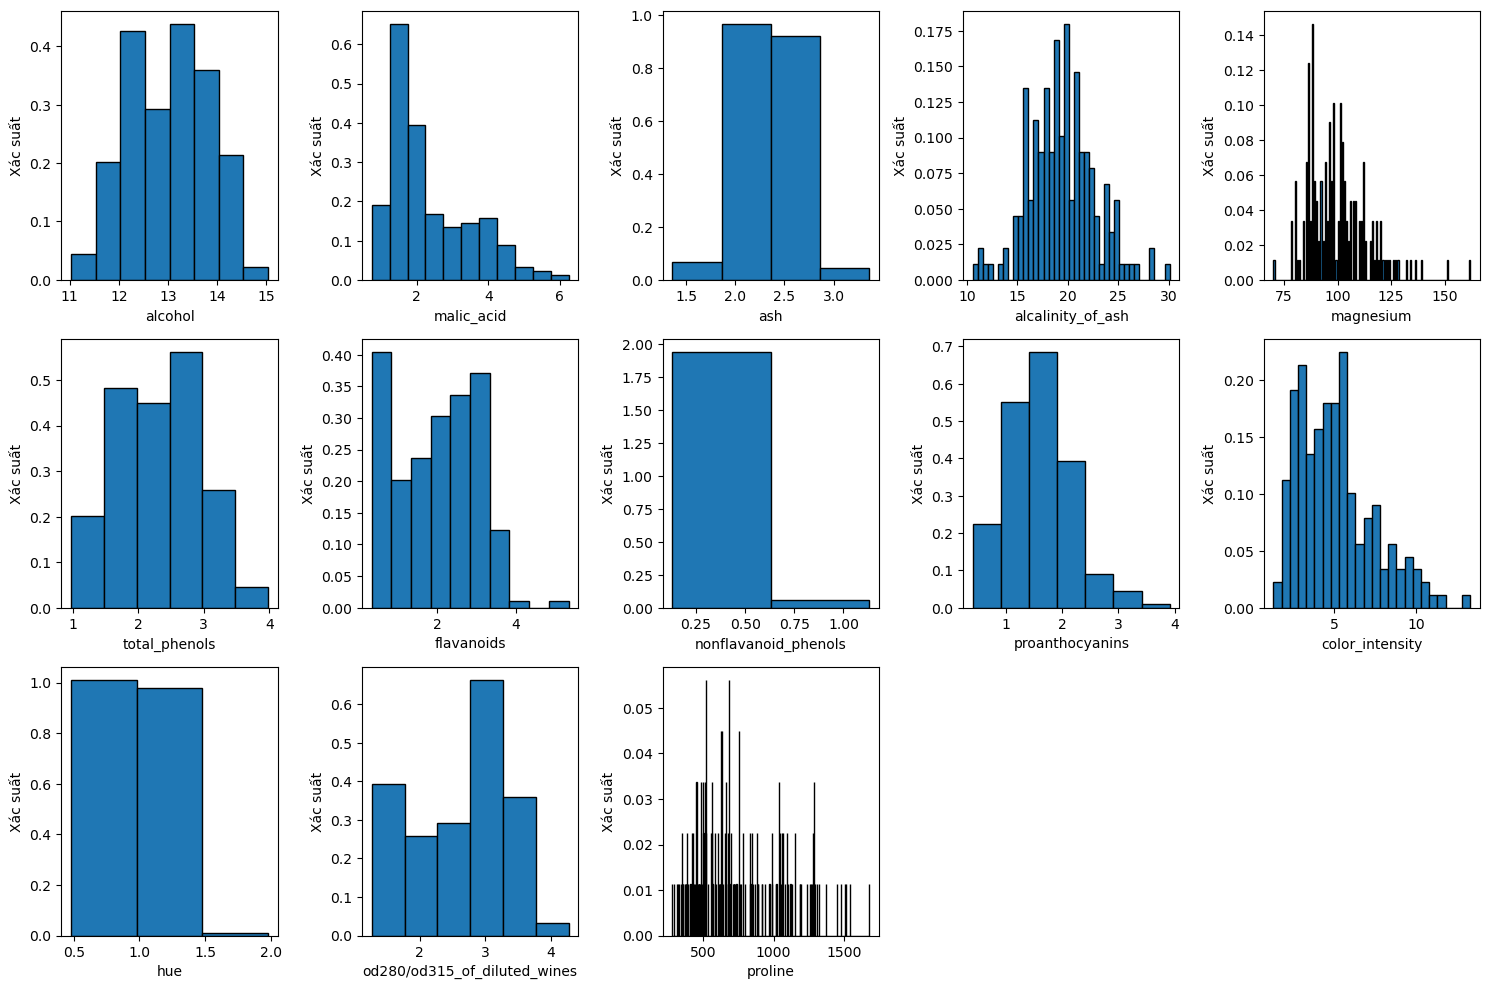

In [10]:
# Lấy tên các đặc trưng
feature_names = list(wine.feature_names)

# Số lượng đặc trưng
num_features = WineData.shape[1] - 1  # Bỏ qua cột target

# Vẽ histogram cho từng đặc trưng
plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(3, 5, i + 1)  # Sắp xếp các subplot thành 3 hàng và 5 cột
    feature_data = WineData[:, i]
    plt.hist(feature_data, bins=np.arange(min(feature_data), max(feature_data) + 0.5, 0.5), density=True, edgecolor='black')
    plt.xlabel(feature_names[i])
    plt.ylabel('Xác suất')

plt.tight_layout()
plt.show()

In [11]:
import numpy as np

# Giả sử feature_data là một mảng NumPy 2D
feature_data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Duyệt qua tất cả 13 đặc trưng
for i in range(feature_data.shape[1]):
    mean_val = np.mean(feature_data[:, i])
    print(f"Giá trị trung bình của đặc trưng {i + 1}: {mean_val}")


Giá trị trung bình của đặc trưng 1: 5.5
Giá trị trung bình của đặc trưng 2: 6.5
Giá trị trung bình của đặc trưng 3: 7.5


Trung bình của các điểm thực tế: [3.05799717 2.00464927]
Ma trận phương sai của các điểm thực tế:
 [[4.10492189 1.55908223]
 [1.55908223 1.05847938]]


C:\Users\admin\AppData\Local\Temp\ipykernel_15676\4130469243.py:33: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(position, width, height, angle, **kwargs)


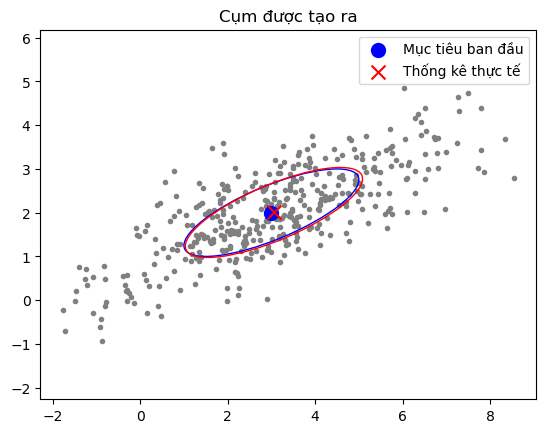

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Chọn một cụm để tạo:
# Số điểm, trung bình, và ma trận hiệp phương sai
N = 400
mu = np.array([3, 2])
S = np.array([[4, 1.5], [1.5, 1]])

# Thực hiện phân tích giá trị riêng của ma trận hiệp phương sai
d, v = np.linalg.eig(S)

# Tạo mới các điểm ngẫu nhiên
pts = mu + (v @ np.sqrt(np.diag(d)) @ np.random.randn(2, N)).T

# Tìm trung bình và ma trận hiệp phương sai của các điểm mới
realized_mean = np.mean(pts, axis=0)
realized_cov = np.cov(pts, rowvar=False)
print("Trung bình của các điểm thực tế:", realized_mean)
print("Ma trận phương sai của các điểm thực tế:\n", realized_cov)

def plot_ellipse(position, covariance, ax=None, **kwargs):
    """Vẽ một hình ellipse với vị trí và ma trận hiệp phương sai cho trước"""
    ax = ax or plt.gca()
    
    # Chuyển ma trận hiệp phương sai thành các trục chính
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
    
    # Vẽ hình ellipse
    ellipse = Ellipse(position, width, height, angle, **kwargs)
    ax.add_patch(ellipse)

# Vẽ các điểm
fig, ax = plt.subplots()
ax.scatter(pts[:, 0], pts[:, 1], marker='.', color='gray')
ax.scatter(mu[0], mu[1], marker='o', color='blue', s=100, label='Mục tiêu ban đầu')
ax.scatter(realized_mean[0], realized_mean[1], marker='x', color='red', s=100, label='Thống kê thực tế')

# Vẽ hình ellipse cho ma trận hiệp phương sai ban đầu
plot_ellipse(mu, S, ax=ax, edgecolor='blue', facecolor='none')
# Vẽ hình ellipse cho ma trận hiệp phương sai thực tế
plot_ellipse(realized_mean, realized_cov, ax=ax, edgecolor='red', facecolor='none')

# Điều chỉnh trục để có tỷ lệ như nhau cho dễ diễn giải
ax.axis('equal')
ax.set_title('Cụm được tạo ra')
ax.legend()

# Hiển thị biểu đồ
plt.show()


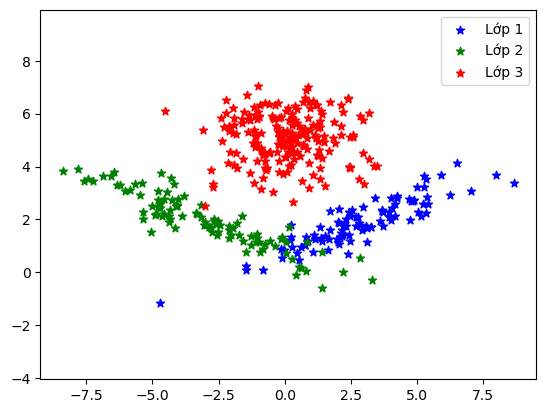

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa ba giá trị trung bình và ma trận hiệp phương sai
mu1 = np.array([3, 2])
S1 = np.array([[5, 2], [2, 1]])

mu2 = np.array([-3, 2])
S2 = np.array([[5, -2], [-2, 1]])

mu3 = np.array([0, 5])
S3 = np.array([[2, 0], [0, 1]])

# Tổng hợp ba tập điểm
def generate_points(mu, S, N):
    d, v = np.linalg.eig(S)
    return mu + (v @ np.sqrt(np.diag(d)) @ np.random.randn(2, N)).T

pts1 = generate_points(mu1, S1, 100)
pts2 = generate_points(mu2, S2, 100)
pts3 = generate_points(mu3, S3, 200)

# Vẽ các điểm đã tổng hợp
# pts1 và pts2 thuộc cùng một lớp, pts3 là một lớp thứ hai
plt.scatter(pts1[:, 0], pts1[:, 1], marker='*', color='b', label='Lớp 1')
plt.scatter(pts2[:, 0], pts2[:, 1], marker='*', color='g' , label='Lớp 2')
plt.scatter(pts3[:, 0], pts3[:, 1], marker='*', color='r', label='Lớp 3')

# Điều chỉnh trục để có tỷ lệ như nhau cho dễ diễn giải
plt.axis('equal')
plt.legend()

# Hiển thị biểu đồ
plt.show()


# Feature Extraction and Selection

# Sử dụng dữ liệu đã lưu trong phần lọc dữ liệu phân tán

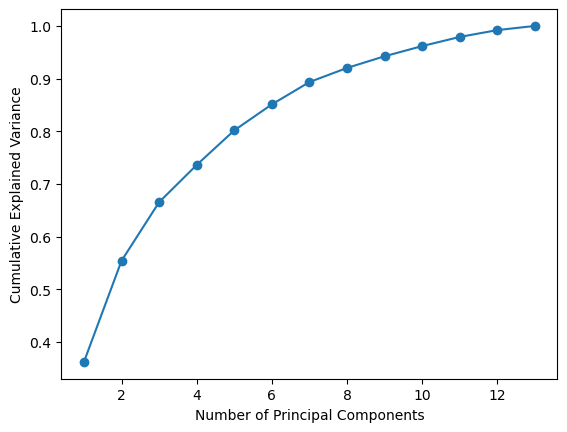

In [85]:
# Sử dụng PCA để giảm chiều dữ liệu 

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Chuẩn hóa dữ liệu
scaler = StandardScaler()
Features_scaled = scaler.fit_transform(loaded_selected_features)

# Áp dụng PCA
pca = PCA()
Features_pca = pca.fit_transform(Features_scaled)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


alcohol: 0.14161428299811962
malic_acid: 0.033059652025652426
ash: 0.015533939876529991
alcalinity_of_ash: 0.02988475827441192
magnesium: 0.0258726446973373
total_phenols: 0.03508046762610704
flavanoids: 0.19448065497563605
nonflavanoid_phenols: 0.007310333827433746
proanthocyanins: 0.018386807918194432
color_intensity: 0.1729611145944593
hue: 0.07693904064266104
od280/od315_of_diluted_wines: 0.11183089019193483
proline: 0.1370454123515224


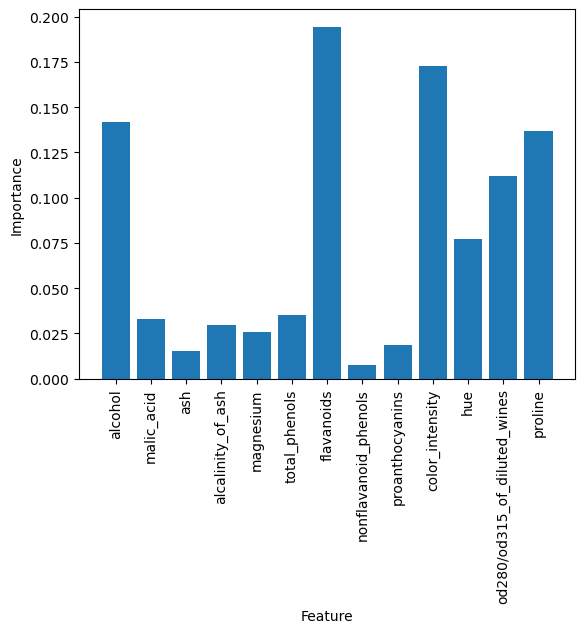

In [91]:
# Lựa chọn số thành phần chính dựa trên biểu đồ hoặc chọn một số cố định
n_components = 6
pca = PCA(n_components=n_components)
Features_pca = pca.fit_transform(Features_scaled)

# Áp dụng mô hình Random Forest để lựa chọn đặc trưng
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(loaded_selected_features, labels)

# Lấy độ quan trọng của đặc trưng
feature_importances = rf.feature_importances_

# In và vẽ biểu đồ độ quan trọng của đặc trưng
for feature, importance in zip(wine.feature_names, feature_importances):
    print(f"{feature}: {importance}")

# Vẽ biểu đồ độ quan trọng của đặc trưng
plt.bar(wine.feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# 6 đặc trưng quan trọng nhất

In [101]:
# Sắp xếp độ quan trọng của đặc trưng giảm dần
sorted_indices = np.argsort(feature_importances)[::-1]

# Lấy tên của 6 đặc trưng có độ quan trọng cao nhất
top_6_features = np.array(wine.feature_names)[sorted_indices[:6]]

# In ra tên các đặc trưng có độ quan trọng cao nhất
print("Top 6 Important Features:")
for feature in top_6_features:
    print(feature)


Top 6 Important Features:
flavanoids
color_intensity
alcohol
proline
od280/od315_of_diluted_wines
hue


In [105]:
# Lấy chỉ số của 6 thành phần có độ quan trọng cao nhất
top_feature_indices = sorted_indices[:6]

# Chuyển đổi chỉ số thành kiểu dữ liệu số nguyên
top_feature_indices = np.array(top_feature_indices, dtype=int)

# Lưu lại dữ liệu mới chỉ chứa 6 thành phần có độ quan trọng cao nhất
Features_selected = Features_scaled[:, top_feature_indices]

# In ra tên các đặc trưng đã lựa chọn
selected_feature_names = np.array(wine.feature_names)[top_feature_indices]
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

# Sử dụng Features_selected cho Feature Extraction and Selection 1 lần nữa
# (Thực hiện các bước tiếp theo của quá trình Feature Extraction and Selection)



Selected Features:
flavanoids
color_intensity
alcohol
proline
od280/od315_of_diluted_wines
hue


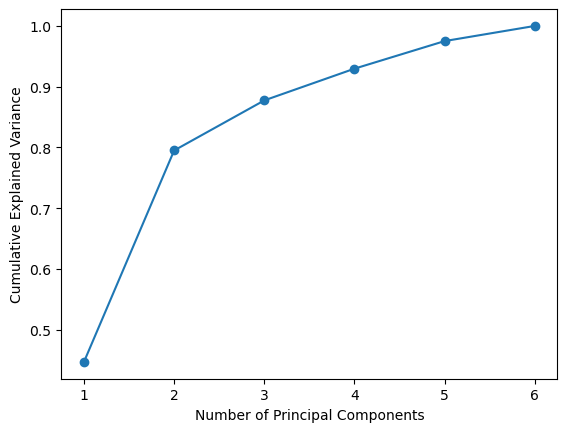

In [106]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
Features_scaled = scaler.fit_transform(Features_selected)

# Áp dụng PCA
pca = PCA()
Features_pca = pca.fit_transform(Features_scaled)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Distance-Based Classification

In [107]:
# Sử dụng mô hình KNN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(Features_pca, labels, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Khởi tạo mô hình KNN với số láng giềng là 3 (có thể điều chỉnh)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = knn_model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [108]:
from sklearn.model_selection import cross_val_score

# Tạo mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Thực hiện kiểm định chéo với 5 fold
cv_scores = cross_val_score(knn_model, Features_pca, labels, cv=5)

# In kết quả kiểm định chéo
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.91666667 0.94444444 0.97222222 1.         1.        ]
Average Accuracy: 0.9666666666666668
